In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Statewise_Daily.csv')
daily_df = pd.read_csv('../Data/COVID_Daily_Count.csv')
conf_df = df.loc[(df['Status']=="Confirmed"),:]
recvd_df = df.loc[(df['Status']=="Recovered"),:]
dead_df = df.loc[(df['Status']=="Deceased"),:]

# Active Cases

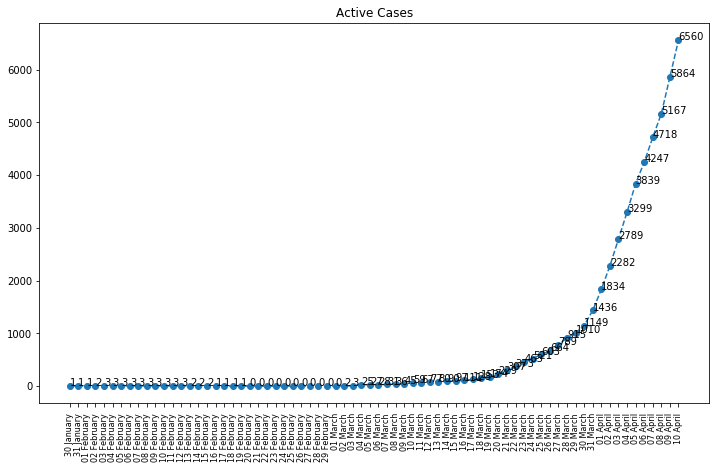

In [17]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Active Cases')
ax.plot(daily_df['Date'], daily_df['Active'], marker='o', linestyle='--')

for i,j in zip(daily_df['Date'], daily_df['Active']):
    plt.text(i,j, str(j))
plt.xticks(rotation=90, fontsize=8)
# plt.fill_between(daily_df['Date'], daily_df['Active'], 0, alpha='0.05')
plt.show()


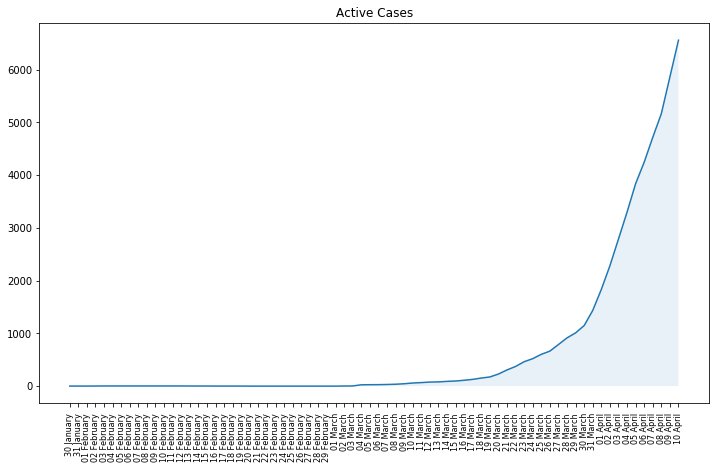

In [16]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Active Cases')
ax.plot(daily_df['Date'], daily_df['Active'])

plt.xticks(rotation=90, fontsize=8)
plt.fill_between(daily_df['Date'], daily_df['Active'], 0, alpha='0.1')
plt.show()

# Daily Case Analysis

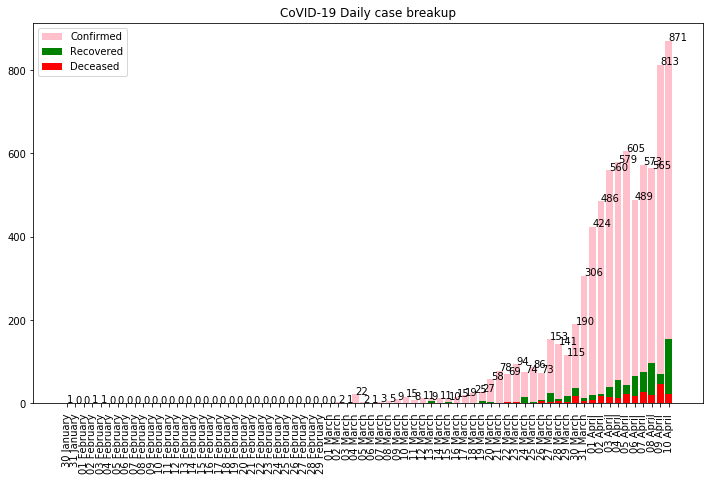

In [18]:
fig = plt.figure(figsize=((12,7)))
ax = fig.add_subplot(111)
ax.set_title('CoVID-19 Daily case breakup')

# ax.plot(df['Date'], df['Daily Confirmed'], color='black')
ax.bar(daily_df['Date'], daily_df['Daily Confirmed'], color='pink')
for i,j in zip(daily_df['Date'], daily_df['Daily Confirmed']):
    plt.text(i,j, str(j))
        

ax.bar(daily_df['Date'], daily_df['Daily Recovered'], color='green')
# for i,j in zip(df['Date'], df['Daily Recovered']):
#     plt.text(i,j, str(j))
    
ax.bar(daily_df['Date'], daily_df['Daily Deceased'], color='red')
# for i,j in zip(df['Date'], df['Daily Deceased']):
#     plt.text(i,j, str(j))
        

# ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
# ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Confirmed',
            'Recovered', 
            'Deceased'])
plt.xticks(rotation=90)
plt.show()

# Total Case Analysis

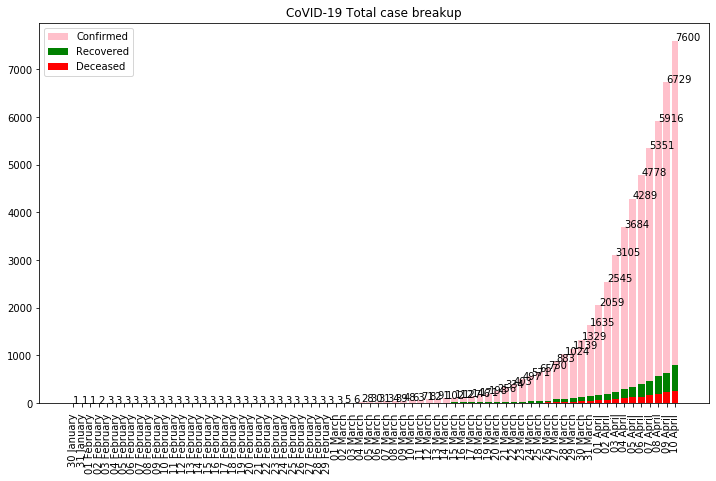

In [19]:
fig = plt.figure(figsize=((12,7)))
ax = fig.add_subplot(111)
ax.set_title('CoVID-19 Total case breakup')

ax.bar(daily_df['Date'], daily_df['Total Confirmed'], color='pink')
for i,j in zip(daily_df['Date'], daily_df['Total Confirmed']):
    plt.text(i,j, str(j))
        

ax.bar(daily_df['Date'], daily_df['Total Recovered'], color='green')
# for i,j in zip(df['Date'], df['Total Recovered']):
#     plt.text(i,j, str(j))
    
ax.bar(daily_df['Date'], daily_df['Total Deceased'], color='red')
# for i,j in zip(df['Date'], df['Total Deceased']):
#     plt.text(i,j, str(j))
        

# ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
# ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Confirmed',
            'Recovered', 
            'Deceased'])
plt.xticks(rotation=90)
plt.show()

## Rate of Growth

Current Growth rate: 11.46%


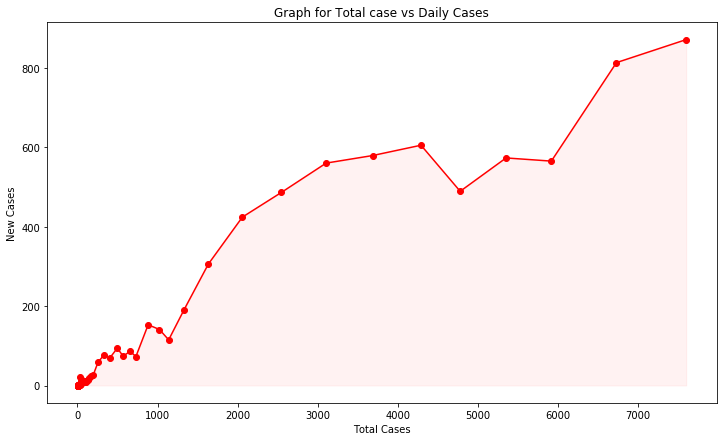

In [20]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Graph for Total case vs Daily Cases')
ax.plot(daily_df['Total Confirmed'], daily_df['Daily Confirmed'], marker='o', color='red')

for i,j in zip(daily_df['Total Confirmed'], daily_df['Daily Confirmed']):
    Rate = (j/i)*100
    Rate = "{:.2f}%".format(round(Rate, 2))
#     plt.text(i,j, Rate)
print('Current Growth rate:', Rate)
    

ax.set_xlabel('Total Cases')
ax.set_ylabel('New Cases')
# plt.yticks(rotation=90)

plt.fill_between(daily_df['Total Confirmed'], daily_df['Daily Confirmed'], 0, color='red', alpha='0.05')
plt.show()

## Logarithmic Graph to get the point for flattening of curve

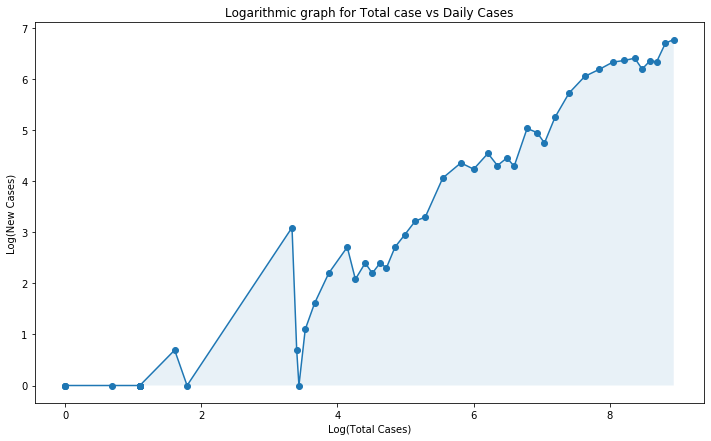

In [21]:
def log(num):
    if num == 0:
        return 0
    return np.log(num)

daily_df['Log_Total_confirm'] = daily_df['Total Confirmed'].astype(int).apply(log)
daily_df['Log_daily_confirm'] = daily_df['Daily Confirmed'].astype(int).apply(log)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Logarithmic graph for Total case vs Daily Cases')

ax.plot(daily_df['Log_Total_confirm'], daily_df['Log_daily_confirm'], marker='o')

ax.set_xlabel('Log(Total Cases)')
ax.set_ylabel('Log(New Cases)')

plt.fill_between(daily_df['Log_Total_confirm'], daily_df['Log_daily_confirm'], 0, alpha='0.1')
# plt.yticks(rotation=90)
plt.show()

# Statewise Anlaysis

In [106]:
print(list(conf_df))

['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB']


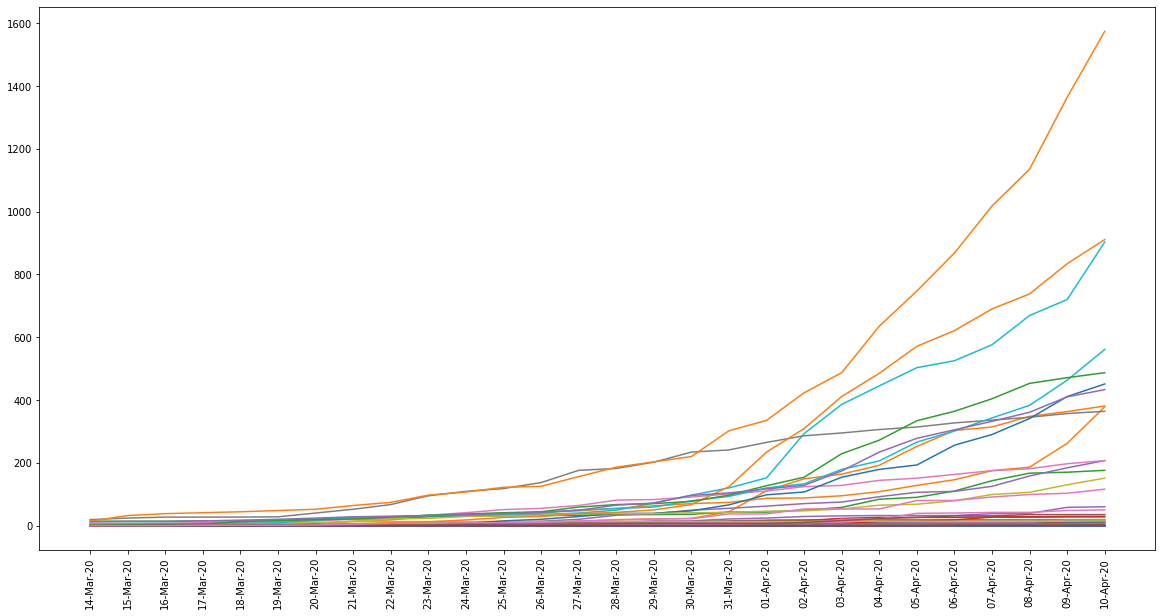

In [22]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

for i in range(3, len(list(conf_df))):
    ax.plot(conf_df['Date'], np.cumsum(conf_df[conf_df.columns[i]]))
plt.xticks(rotation=90)
plt.show()
# conf_df.plot(mark_right=False)